<a href="https://colab.research.google.com/github/maniranjan2023/google-colab/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df1 = pd.read_csv("/content/drive/MyDrive/hotel_bookings 2.csv")
df1.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,22/4/2015


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [59]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [60]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [61]:
df1['is_canceled'].unique()

array([0, 1])

In [62]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [63]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [64]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [65]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [66]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

**Cleaning data **

Cleaning the data before EDA as it will remove the ambigous data that can affect the outcome of EDA.

In [67]:
df1[df1.duplicated()].shape

(31994, 32)

In [68]:
df1.drop_duplicates(inplace = True)

In [69]:
df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [70]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [71]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [72]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

In [73]:
df1['country'].fillna('others', inplace = True)

In [74]:
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [75]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [76]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

In [77]:
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [78]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

**EDA**

In [79]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

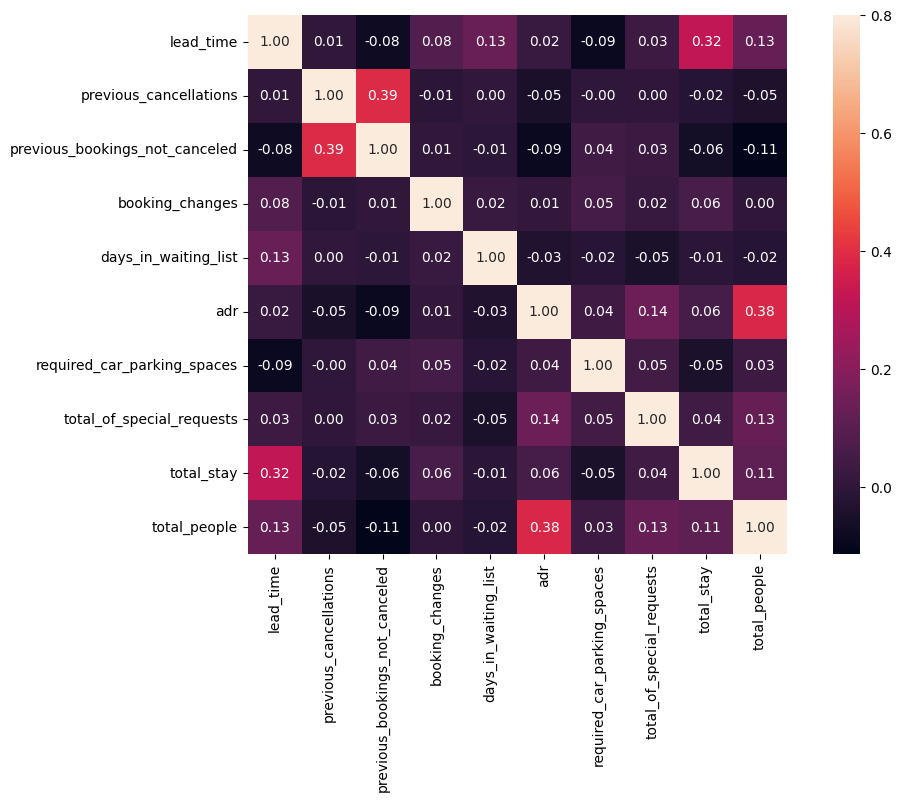

In [80]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1. Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2. adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

how length of stay affects the adr?

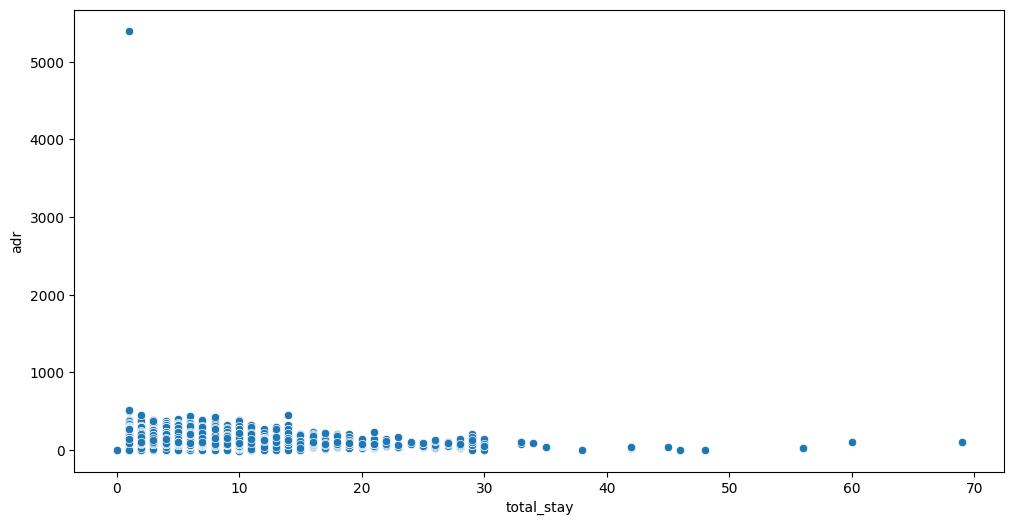

In [81]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

In [82]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

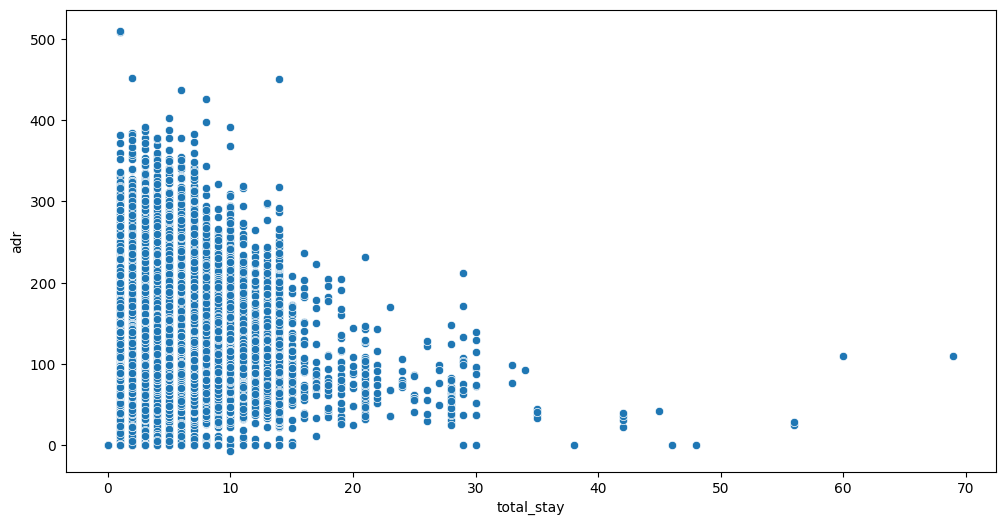

In [83]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

In [84]:
#Which agent makes most no. of bookings?
df1.isnull().sum().sort_values(ascending = False)[:6]
df1[['company','agent','country','children']] = df1[['company','agent','country','children']].fillna(0)




In [85]:
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                   0
days_in_waiting_list    0
reserved_room_type      0
assigned_room_type      0
booking_changes         0
deposit_type            0
dtype: int64

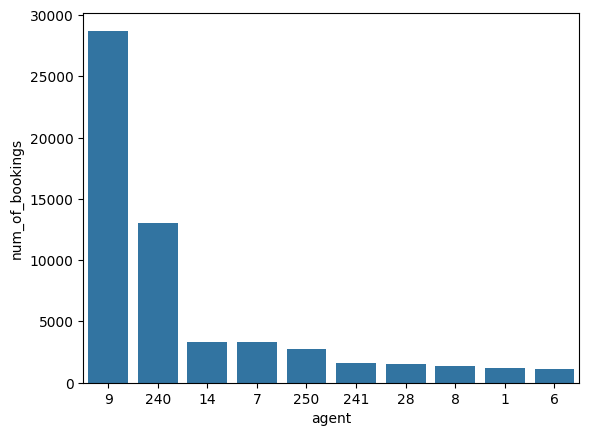

In [86]:
md=df1[df1['agent']!=0]
agent_bookings = md['agent'].value_counts().reset_index()
agent_bookings.columns = ['agent', 'num_of_bookings']
top_10_agents = agent_bookings.head(10)
sns.barplot(x = 'agent', y = 'num_of_bookings', data = top_10_agents, order = top_10_agents.sort_values('num_of_bookings', ascending = False).agent)
plt.show('5')

Agent no. 9 has made most no. of bookings.

<Axes: xlabel='room_type', ylabel='num_of_bookings'>

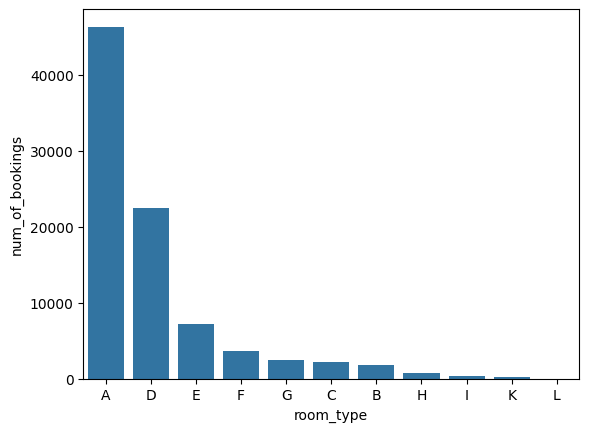

In [87]:
#Which room type is in most demand and which room type generates highest adr?
mn=df1['assigned_room_type'].value_counts().reset_index()
mn.columns = ['room_type', 'num_of_bookings']
sns.barplot(x = 'room_type', y = 'num_of_bookings', data = mn, order = mn.sort_values('num_of_bookings', ascending = False).room_type)

Most demanded room type is A

<Axes: xlabel='assigned_room_type', ylabel='adr'>

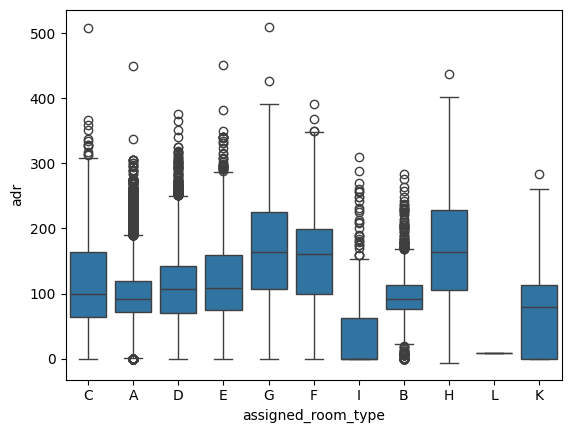

In [88]:
mn=df1['assigned_room_type'].value_counts().reset_index()
mn.columns= ['room_type', 'num_of_bookings']
df=df1[df1['adr']<5000]
sns.boxplot( x = df['assigned_room_type'], y = df['adr'])

Better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

<Axes: xlabel='meal', ylabel='count'>

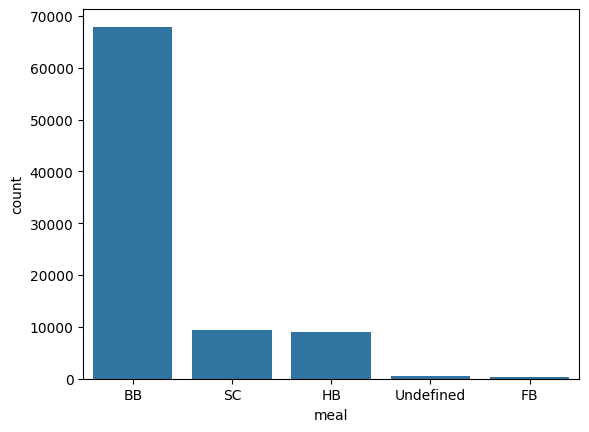

In [89]:
#Which meal type is most preffered meal of customers?
mn=df1['meal'].value_counts().reset_index()
mn.columns=['meal','count']
sns.barplot(x = 'meal', y = 'count', data = mn, order = mn.sort_values('count', ascending = False).meal)


Most preferred meal type is BB (Bed and breakfast).

<Axes: xlabel='hotel', ylabel='percentage'>

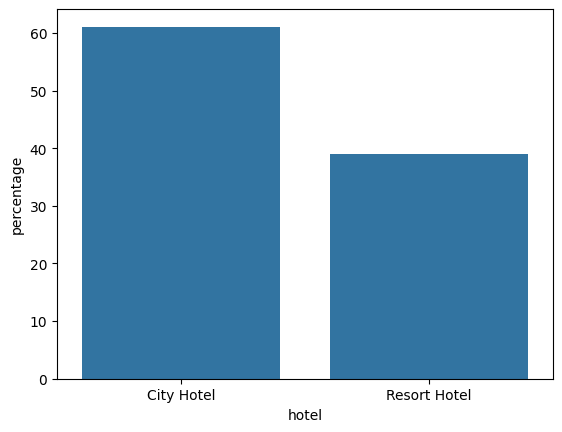

In [90]:
#What is percentage of bookings in each hotel?
mn=df1['hotel'].value_counts().reset_index()
mn.columns=['hotel','count']
mn['percentage']=(mn['count']/df1.shape[0])*100
sns.barplot(x = 'hotel', y = 'percentage', data = mn, order = mn.sort_values('percentage', ascending = False).hotel)



Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

<Axes: xlabel='hotel', ylabel='avg_mean'>

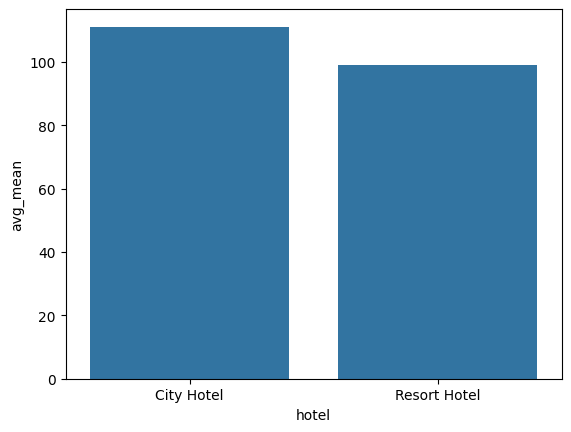

In [91]:
#which hotel seems to make more revenue?

mn=df1.groupby('hotel')['adr'].agg(np.mean).reset_index()
mn.columns=['hotel','avg_mean']
sns.barplot(x = 'hotel', y = 'avg_mean', data = mn, order = mn.sort_values('avg_mean', ascending = False).hotel)

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

<Axes: xlabel='hotel', ylabel='total_sum'>

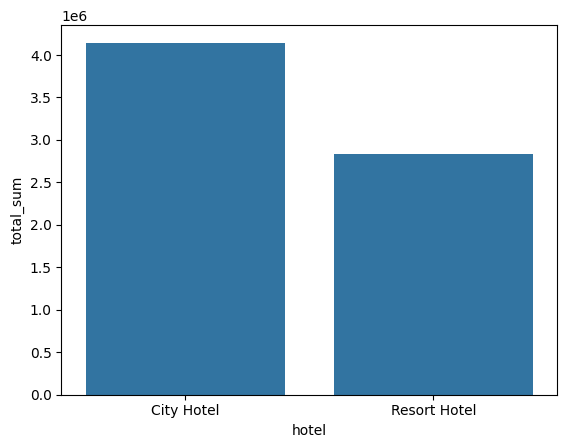

In [92]:
 #Which hotel has higher lead time?

 mn=df1.groupby('hotel')['lead_time'].sum().reset_index()
 mn.columns=['hotel','total_sum']
 sns.barplot(x = 'hotel', y = 'total_sum', data = mn, order = mn.sort_values('total_sum', ascending = False).hotel)

City hotel has slightly higher total lead time. Also total lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

<ipython-input-93-2d7c9020394f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_canceled['total_stay']=not_canceled['stays_in_weekend_nights']+not_canceled['stays_in_week_nights']


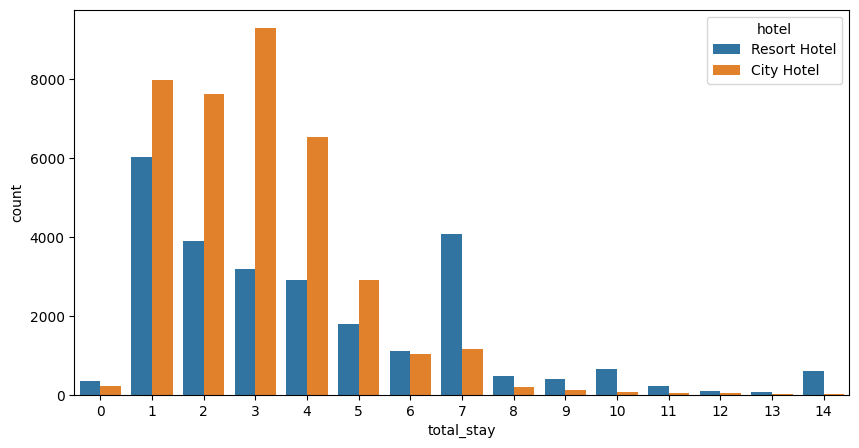

In [93]:
#What is preferred stay length in each hotel?

not_canceled = df1[df1['is_canceled'] == 0]
not_canceled['total_stay']=not_canceled['stays_in_weekend_nights']+not_canceled['stays_in_week_nights']
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

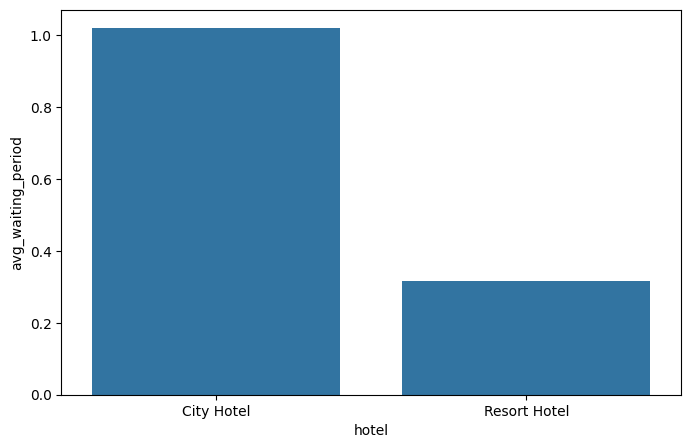

In [94]:
#Which hotel has longer waiting time?
df1.head(10)
d5 = pd.DataFrame(df1.groupby('hotel')['days_in_waiting_list'].agg(np.mean).reset_index())
d5.columns = ['hotel', 'avg_waiting_period']
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

<Axes: xlabel='hotel', ylabel='percentage'>

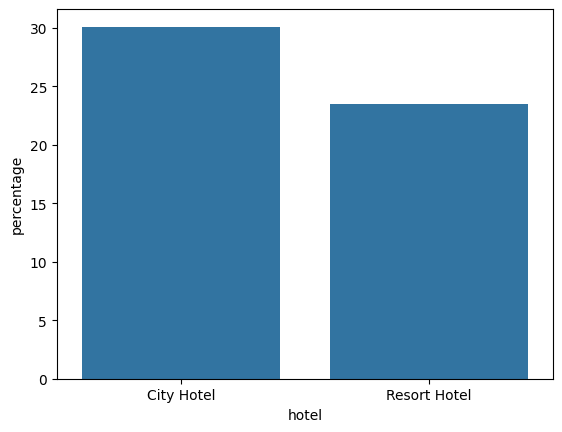

In [95]:
#Which hotel has higher bookings cancellation rate.

df1.head(10)
mk=df1['hotel'].value_counts().reset_index()
mk.columns=['hotel','total_booking']

md=df1[df1['is_canceled']!=0]
mn=md['hotel'].value_counts().reset_index()


mn.columns=['hotel','count']


d3=pd.merge(mk,mn,on='hotel')


mn['percentage']=(d3['count']/d3['total_booking'])*100
sns.barplot(x = 'hotel', y = 'percentage', data = mn, order = mn.sort_values('percentage', ascending = False).hotel)


Almost 30 % of City Hotel bookings got canceled.

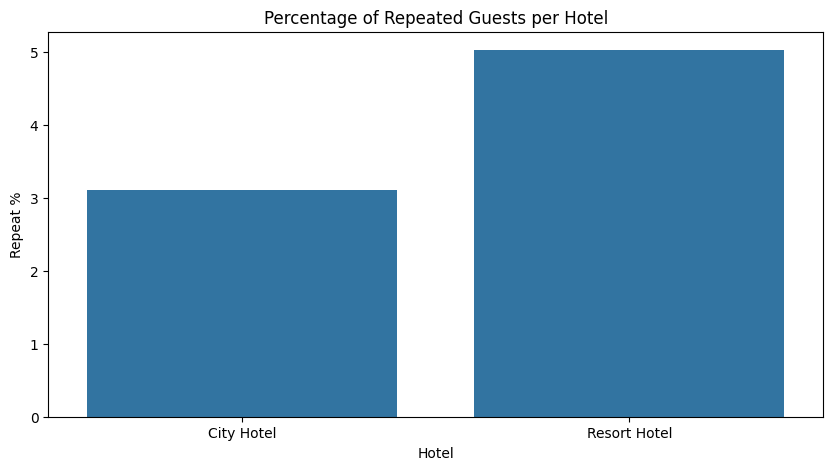

In [96]:
#Which hotel has high chance that its customer will return for another stay?

# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel').size().reset_index()
repeat_grp.columns = ['hotel', 'total_repeated_guests']

# Counting total bookings for each hotel
total_booking = df1.groupby('hotel').size().reset_index(name='total_bookings')

# Merging the dataframes
D3 = pd.merge(repeat_grp, total_booking, on='hotel')

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests'] / D3['total_bookings']) * 100, 2)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x='hotel', y='repeat_%', data=D3)
plt.xlabel('Hotel')
plt.ylabel('Repeat %')
plt.title('Percentage of Repeated Guests per Hotel')
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

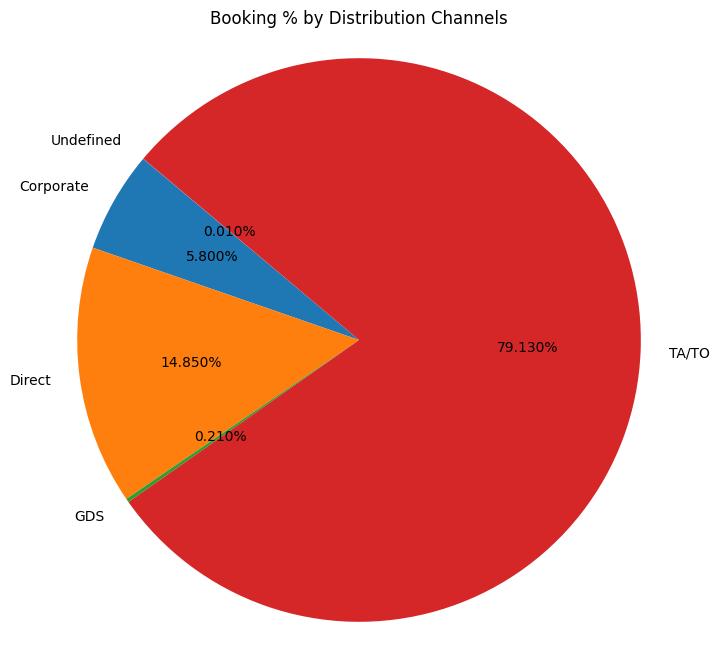

In [97]:
#Which is the most common channel for booking hotels?

df1.head(10)

d1 = pd.DataFrame(round((df1.groupby('distribution_channel').size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
d1.columns = ['distribution_channel', 'Booking_%']
plt.figure(figsize=(8, 8))
plt.pie(d1['Booking_%'], labels=d1['distribution_channel'], autopct='%1.3f%%', startangle=140)
plt.title("Booking % by Distribution Channels")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

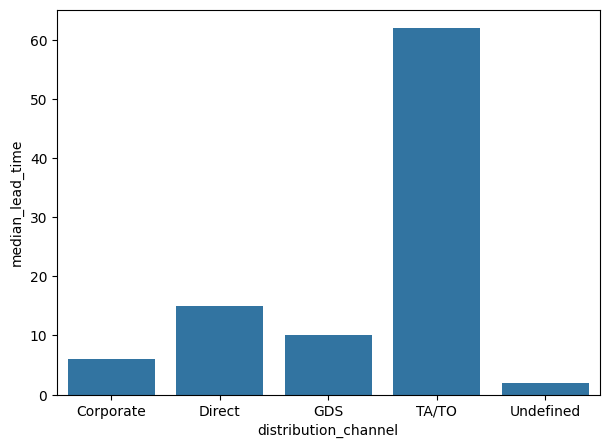

In [98]:
#Which channel is mostly used for early booking of hotels?
df1.head(10)
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

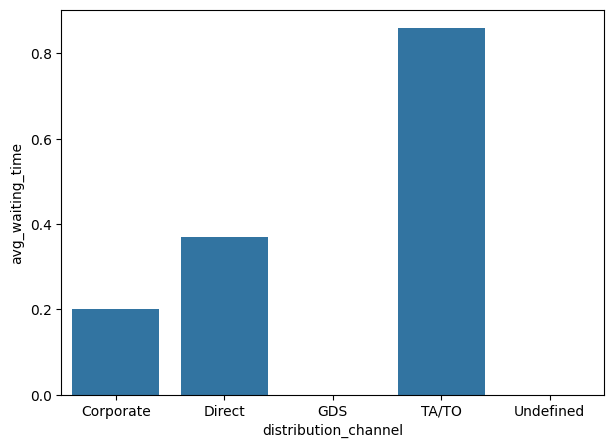

In [99]:
#Which channel has longer average waiting time?
group_by_dc = df1.groupby('distribution_channel')
d4 = pd.DataFrame(round((df1.groupby('distribution_channel')['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()


While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

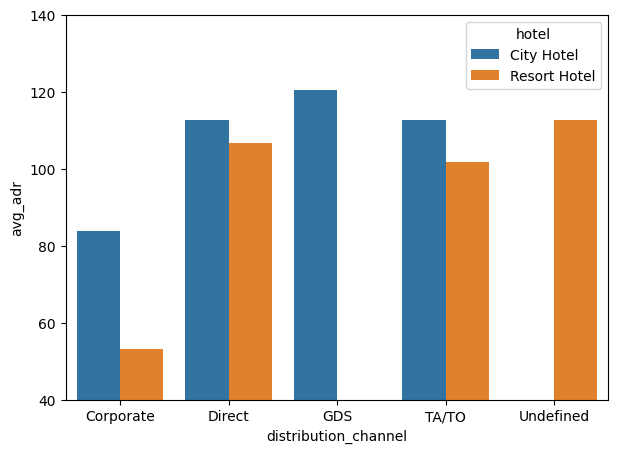

In [100]:
#Which distribution channel brings better revenue generating deals for hotels?
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

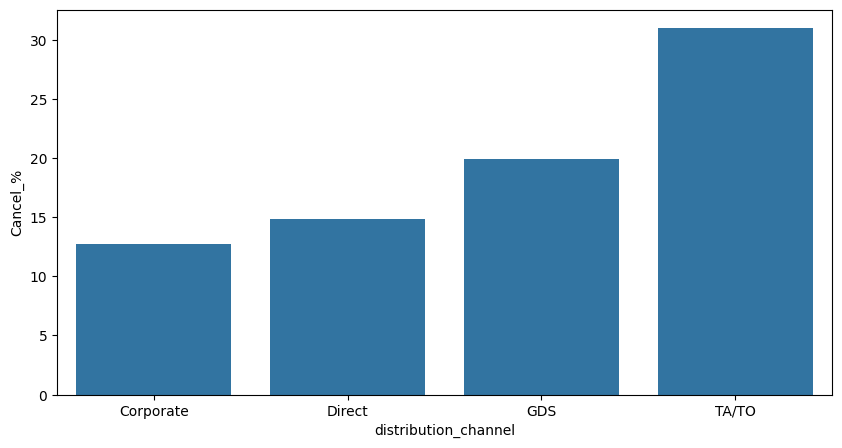

In [101]:
#Which significant distribution channel has highest cancellation percentage?

d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by customers

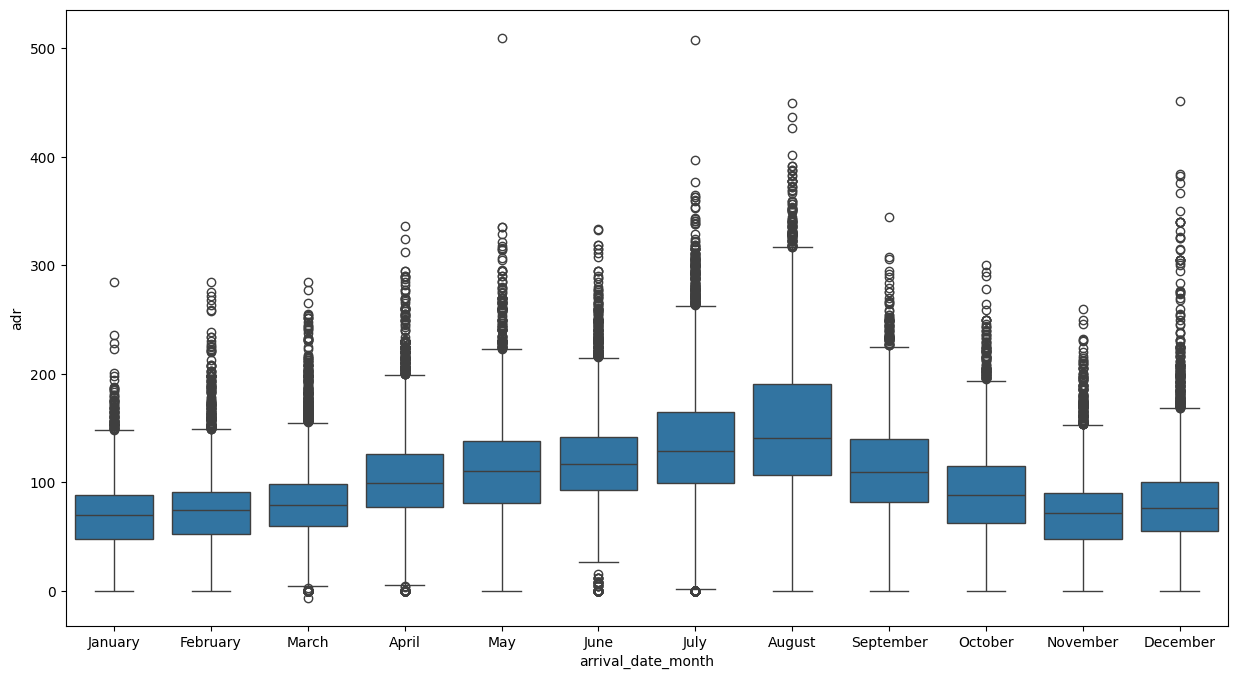

In [102]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
df1=df1[df1['adr']<5000]
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.show()

Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also.

In [103]:
#From where the most guests are coming ?

country_wise_guests = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


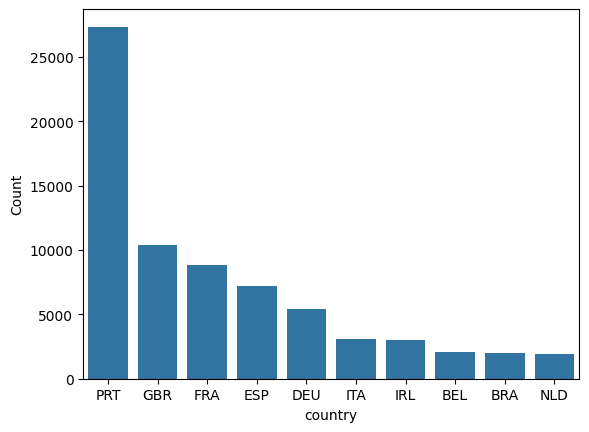

In [104]:
grouped_by_country = df1.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Most guest are from Portugal and other Europian contries.

In [105]:
#How long do people stay at the hotels?

filter = df1['is_canceled'] == 0
data = df1[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,1/7/2015,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,1/7/2015,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2/7/2015,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2/7/2015,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,3/7/2015,2,2


In [106]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

<ipython-input-106-a6d36badedd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,1/7/2015,0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,1/7/2015,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2/7/2015,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2/7/2015,1,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,3/7/2015,2,2,2


In [107]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


<Axes: xlabel='total_nights', ylabel='Number of stays'>

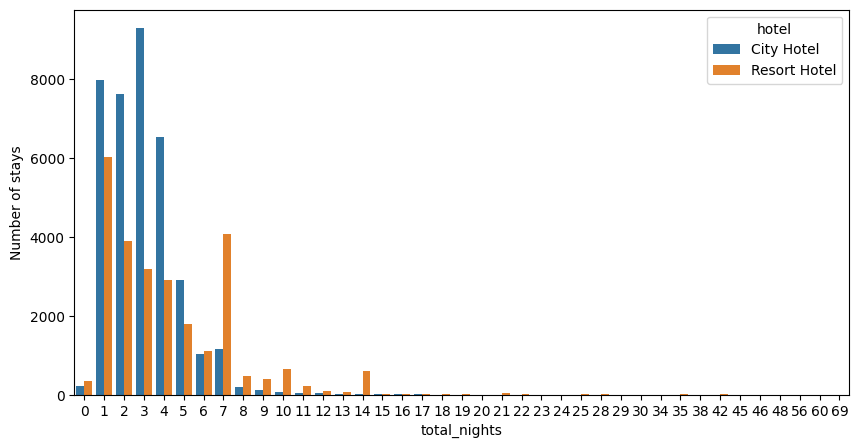

In [108]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

Most people prefer to stay at the hotels of <=5 days.